In [1]:
import pandas as pd
import numpy as np
import explore

In [2]:
df = pd.read_excel('SHOES.xlsx',1)

In [3]:
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [5]:
df.isna().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

In [6]:
# clean dataset
# data already in correct datatyppes
# nulls

In [7]:
'standerdize column names and contents'
df = df.rename(columns=str.lower)
df.brand = df.brand.str.lower()
df['sneaker name'] = df['sneaker name'].str.lower()
df['buyer region'] = df['buyer region'].str.lower()

# Feature Engineering
- 'Extract the day, day of week, and month from the order date and Release date'
- 'create' days since released column'
- 

In [8]:
df['order day'] = df['order date'].dt.day 
df['order day name'] = df['order date'].dt.day_name()
df['order year'] = df['order date'].dt.year
df['order month'] = df['order date'].dt.month

In [9]:
df['release day'] = df['release date'].dt.day
df['release day name'] = df['release date'].dt.day_name()
df['release year'] = df['release date'].dt.year
df['release month'] = df['release date'].dt.month

In [10]:
df['days ordered since release'] = (df['order date'] - df['release date']).dt.days

In [11]:
df.sample(2)

,order date,brand,sneaker name,sale price,retail price,release date,shoe size,buyer region,order day,order day name,order year,order month,release day,release day name,release year,release month,days ordered since release
23509,2018-04-15,yeezy,adidas-yeezy-boost-350-v2-beluga-2pt0,370.0,220,2017-11-25,5.0,oregon,15,Sunday,2018,4,25,Saturday,2017,11,141
30910,2018-06-20,off-white,air-jordan-1-retro-high-off-white-university-blue,700.0,190,2018-06-23,10.0,illinois,20,Wednesday,2018,6,23,Saturday,2018,6,-3


#### calculated stock x shoe cut looking at the avg . by dividing the 4 levels % cut  by 4 and 3% for the transaction fee cut.
#### avg cut from stock x is (8% + 8.5% + 9.0% + 9.5%) / 4 +  a 3% transaction fee. avg level for simplicity(8.75%)

In [12]:
df['stock x level cut'] = df['sale price'] * 0.085

In [13]:
df['stock x trans fee cut'] = df['sale price'] * 0.03

In [14]:
df['stock x total cut'] = df['stock x trans fee cut'] + df['stock x level cut'] 

In [15]:
df['seller before tax profit'] = df['sale price'] - df['stock x total cut']

In [16]:
df.sample(2)

,order date,brand,sneaker name,sale price,retail price,release date,shoe size,buyer region,order day,order day name,...,order month,release day,release day name,release year,release month,days ordered since release,stock x level cut,stock x trans fee cut,stock x total cut,seller before tax profit
69998,2018-12-03,off-white,nike-zoom-fly-off-white-pink,284.0,170,2018-11-28,13.0,texas,3,Monday,...,12,28,Wednesday,2018,11,5,24.14,8.52,32.66,251.34
18885,2018-02-23,yeezy,adidas-yeezy-boost-350-v2-core-black-red-2017,788.0,220,2017-02-11,8.5,massachusetts,23,Friday,...,2,11,Saturday,2017,2,377,66.98,23.64,90.62,697.38


# Exploration

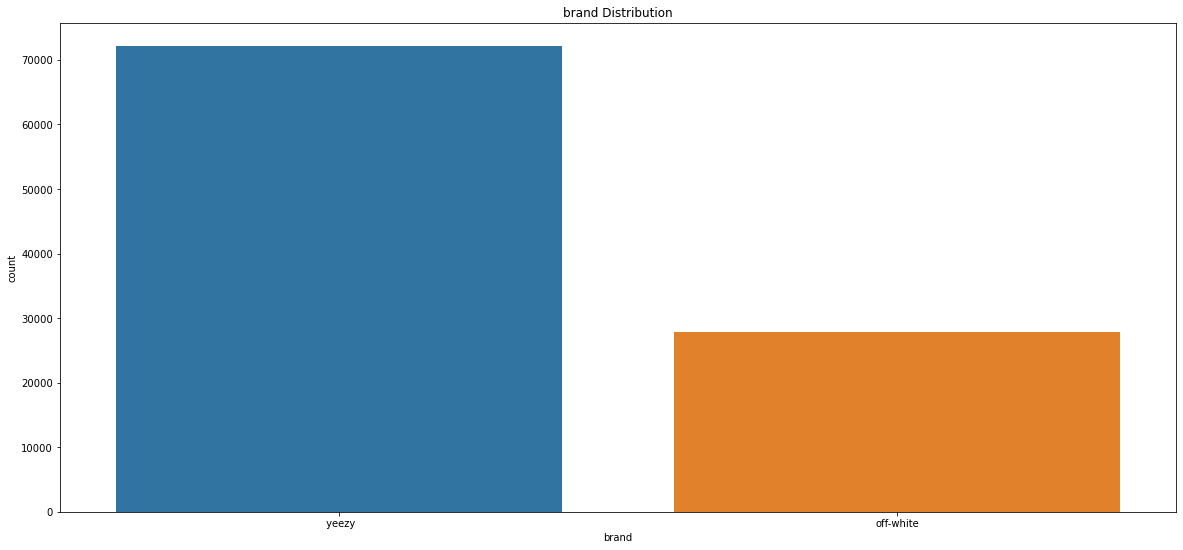

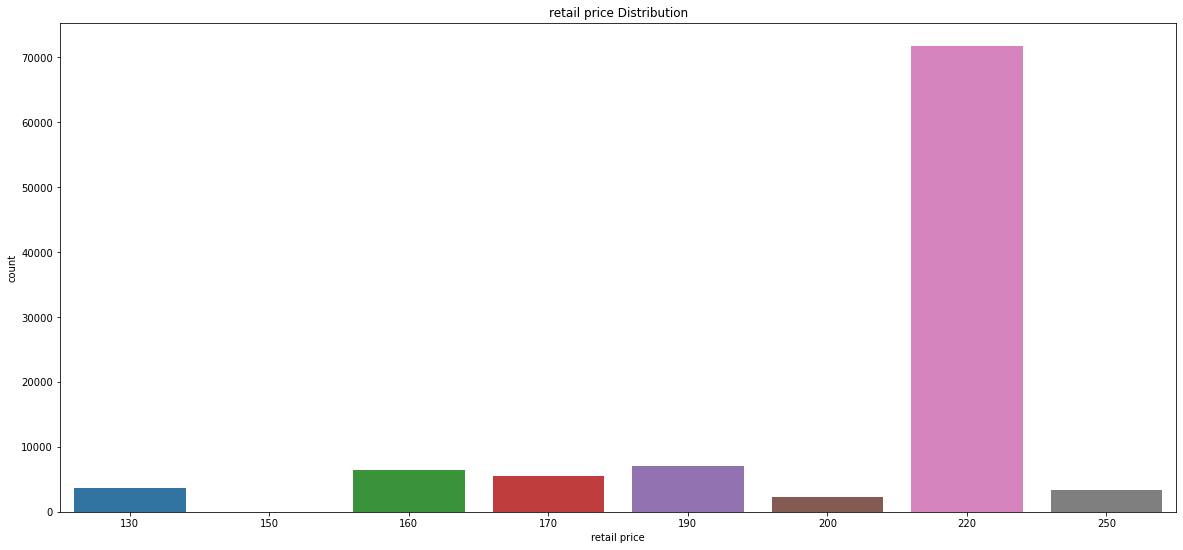

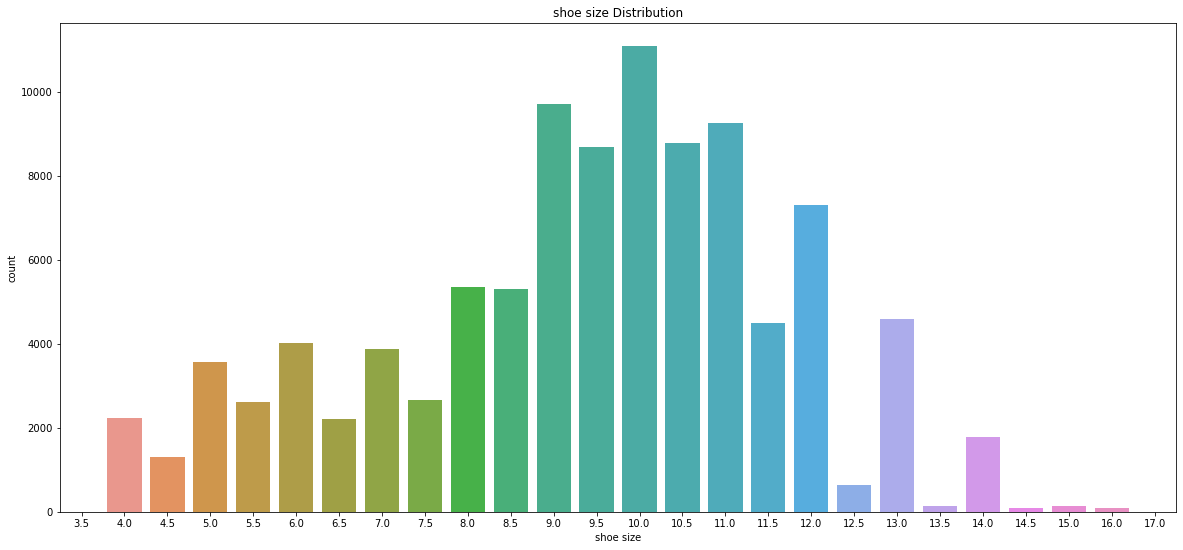

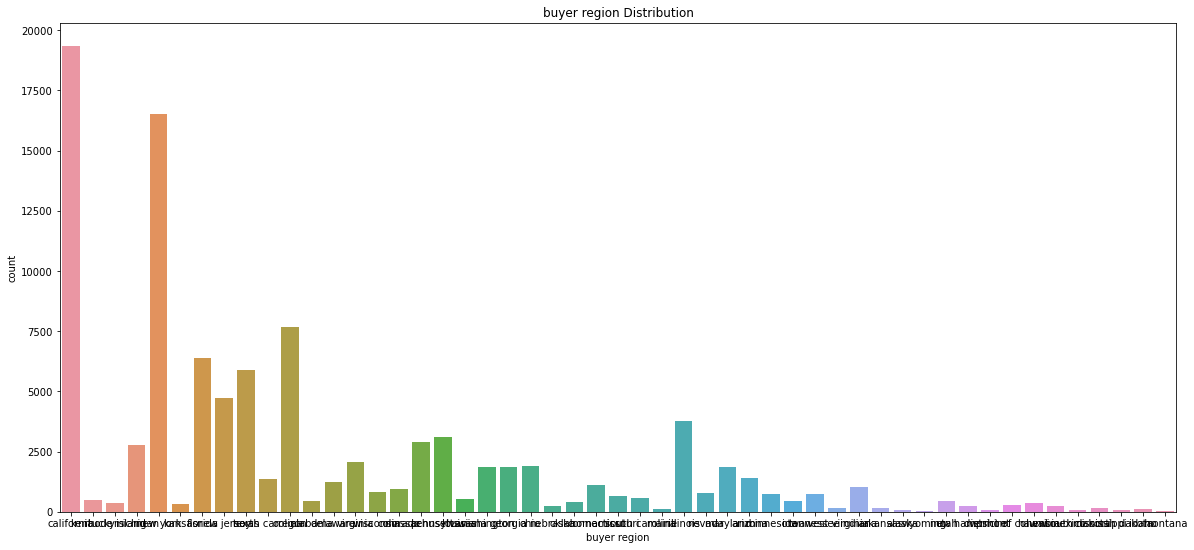

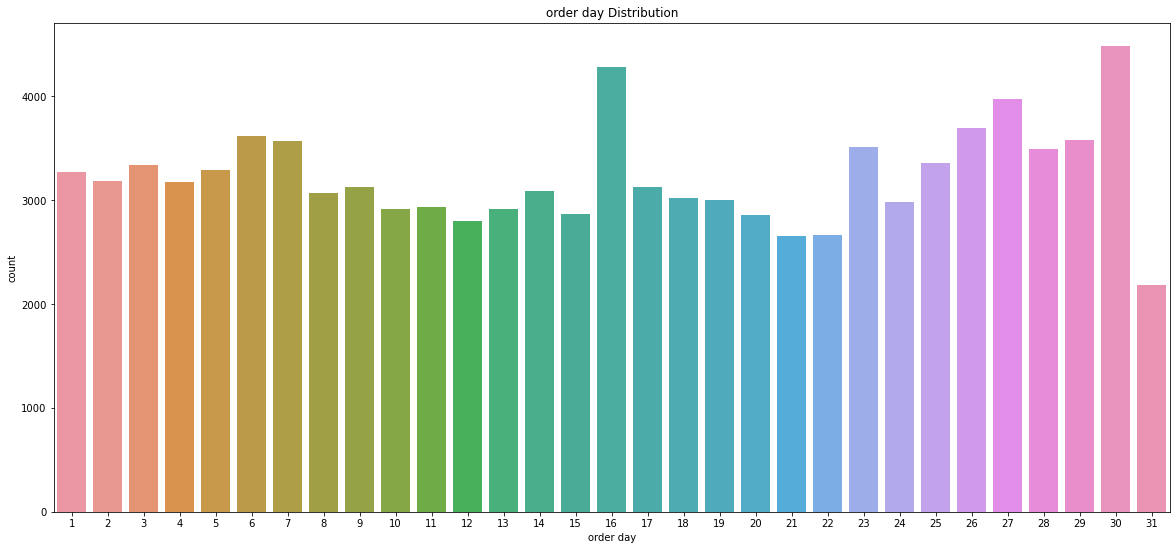

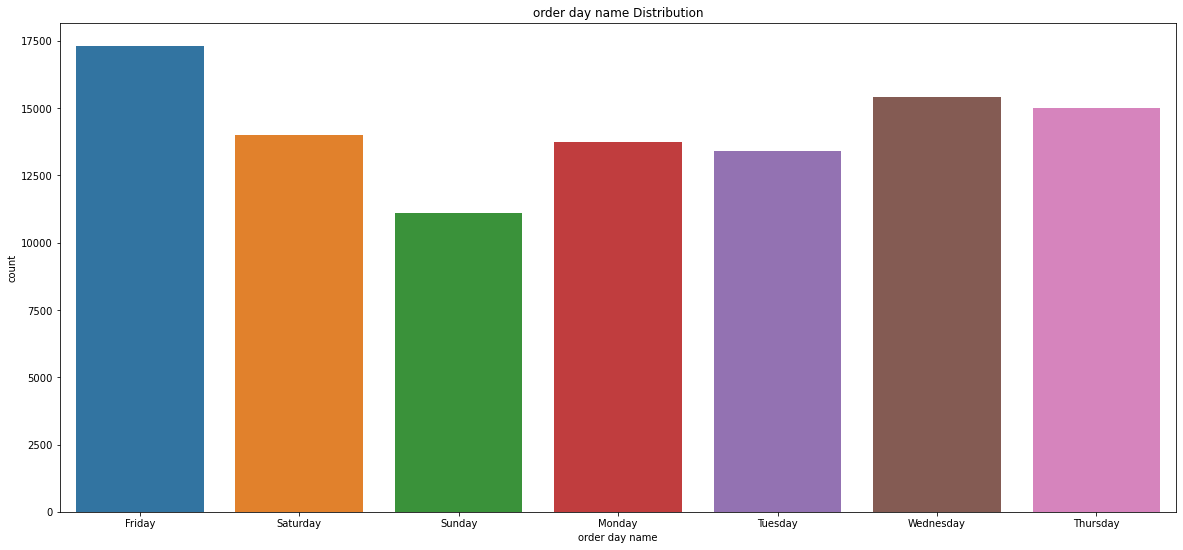

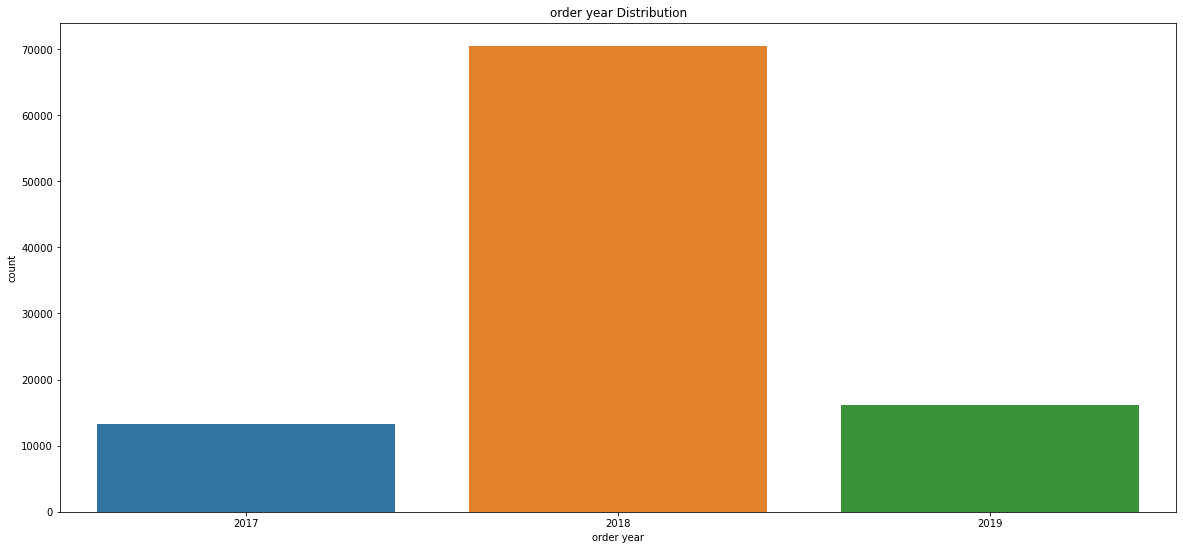

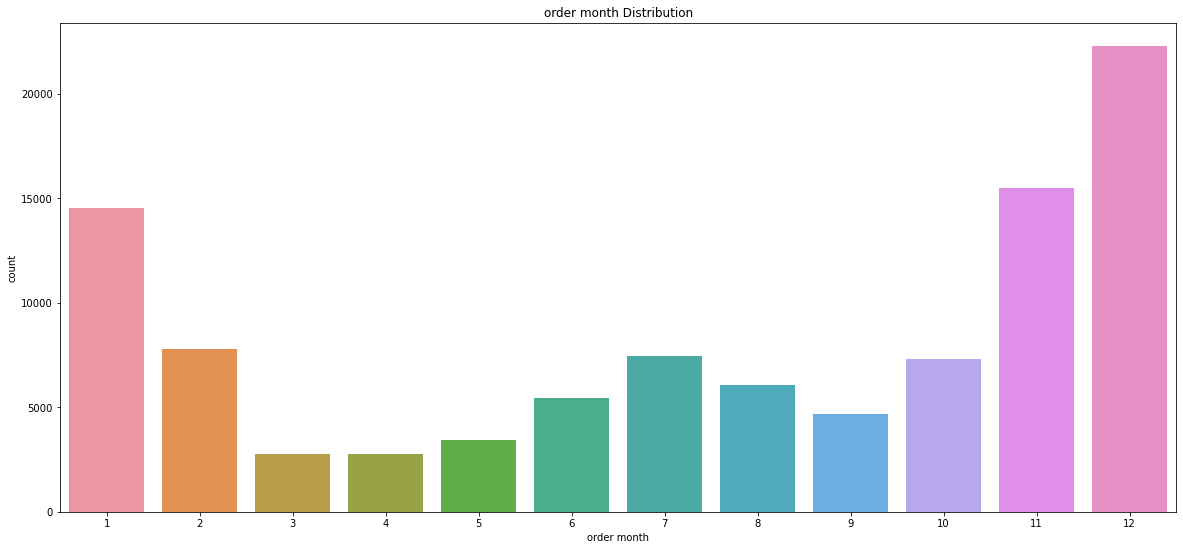

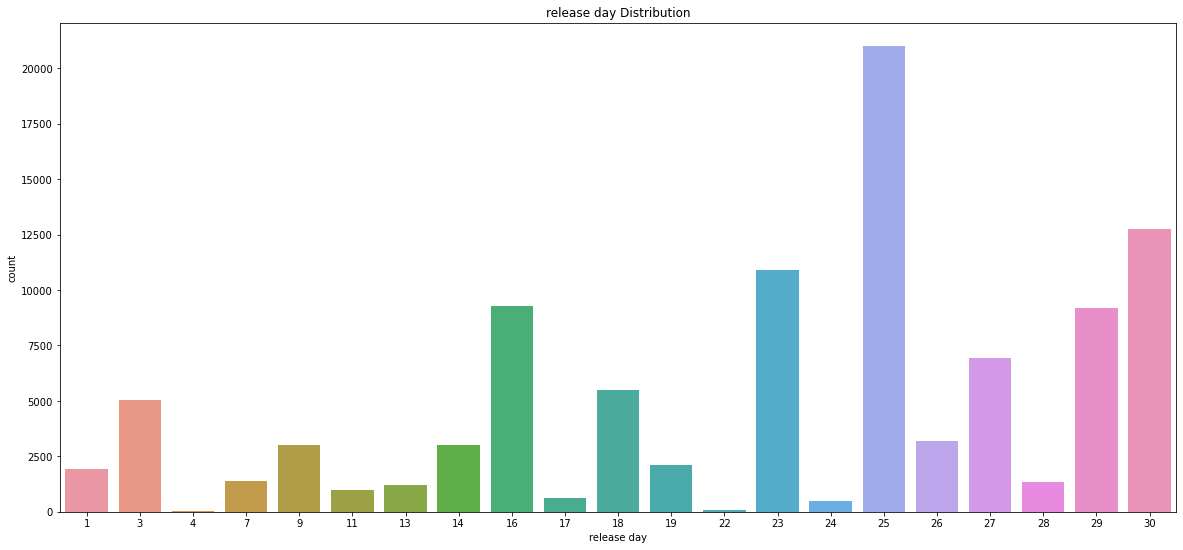

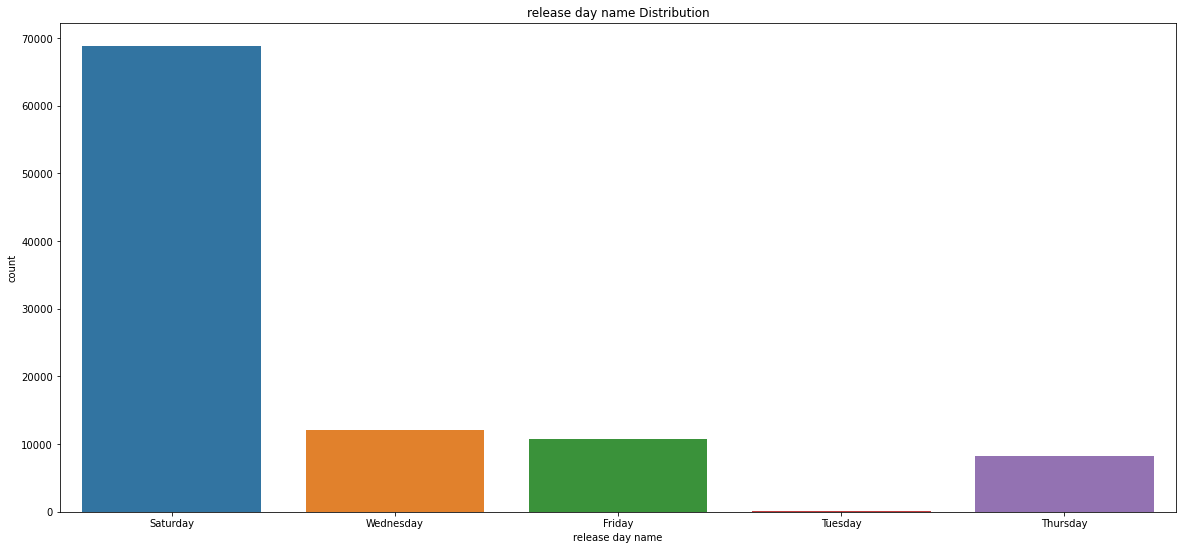

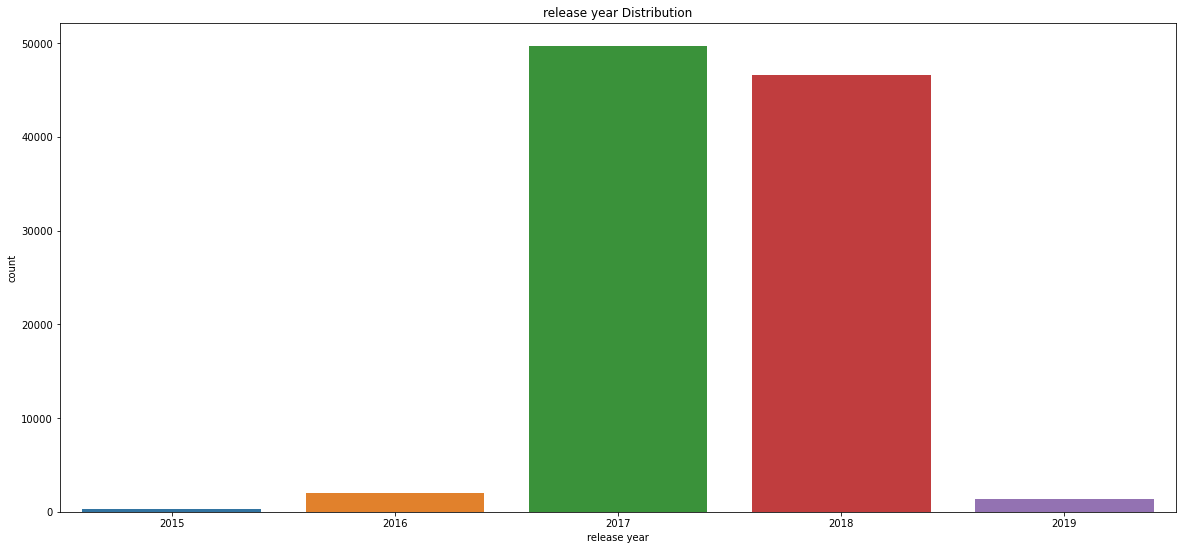

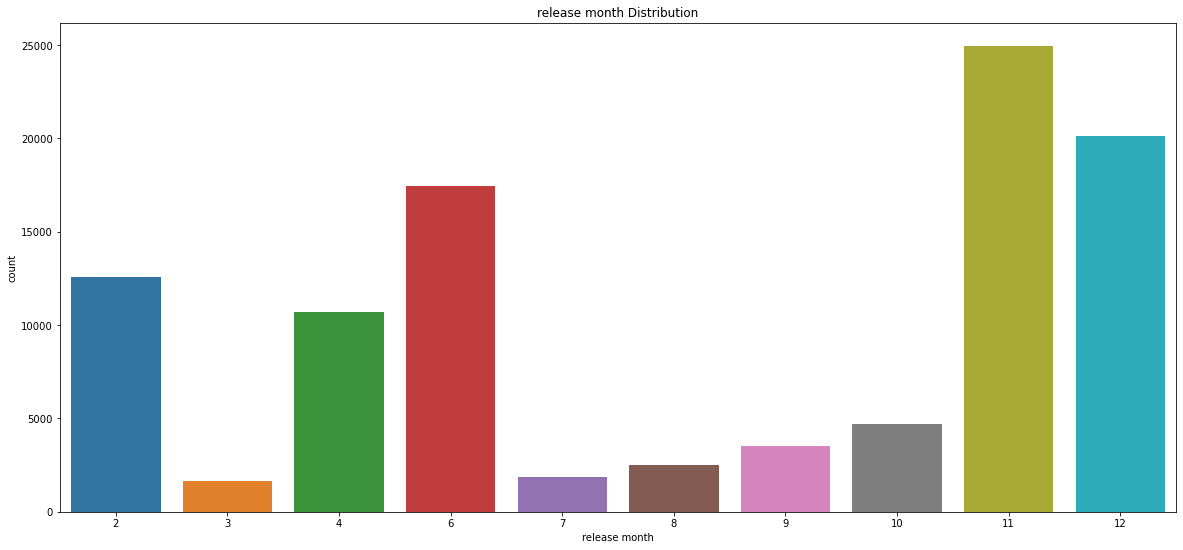

In [17]:
explore.get_distribution(df.drop(columns=['sneaker name','order date', 'release date', 'days ordered since release', 'sale price', 'stock x trans fee cut', 'stock x level cut', 'stock x total cut','seller before tax profit']))

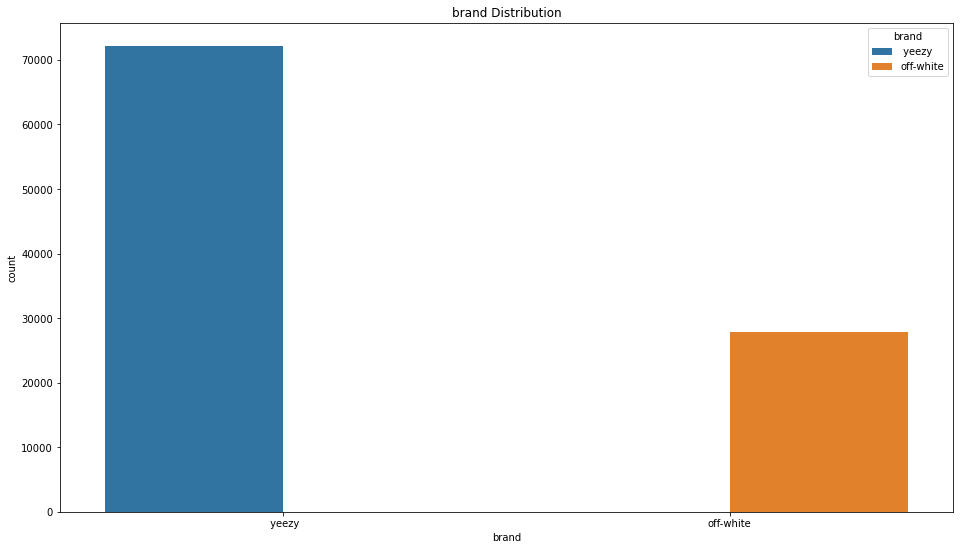

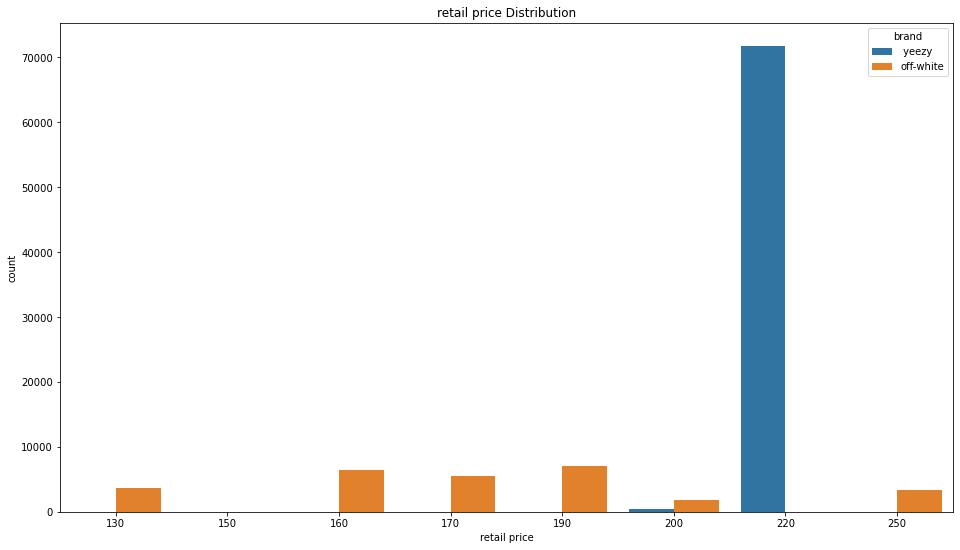

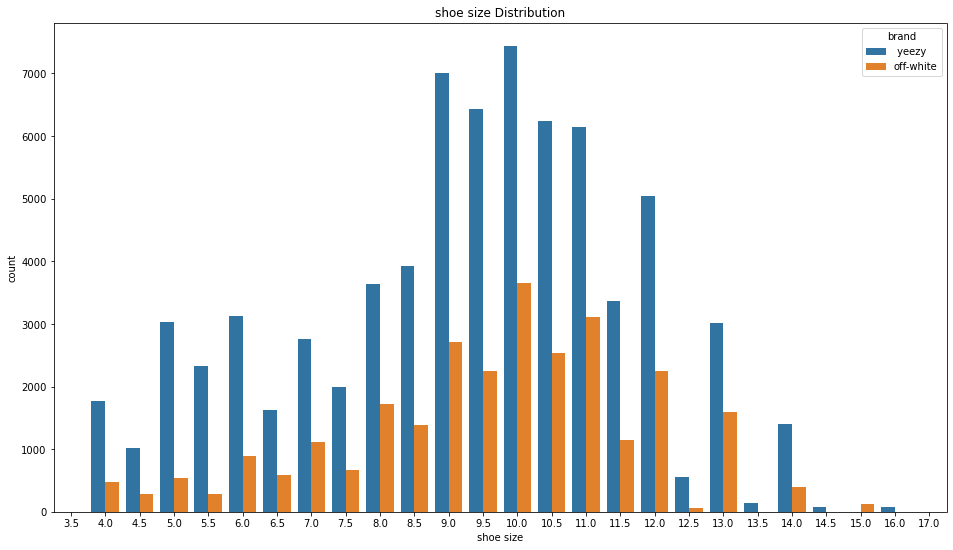

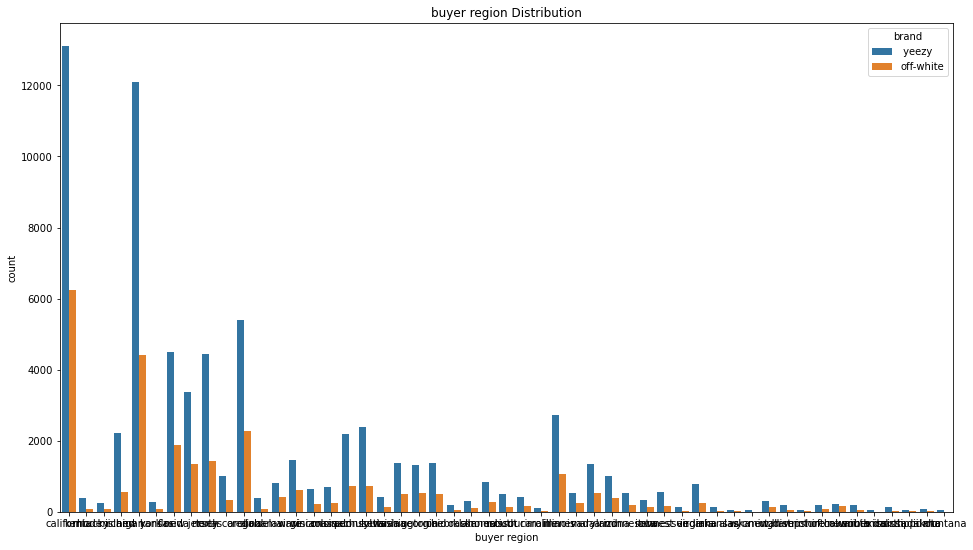

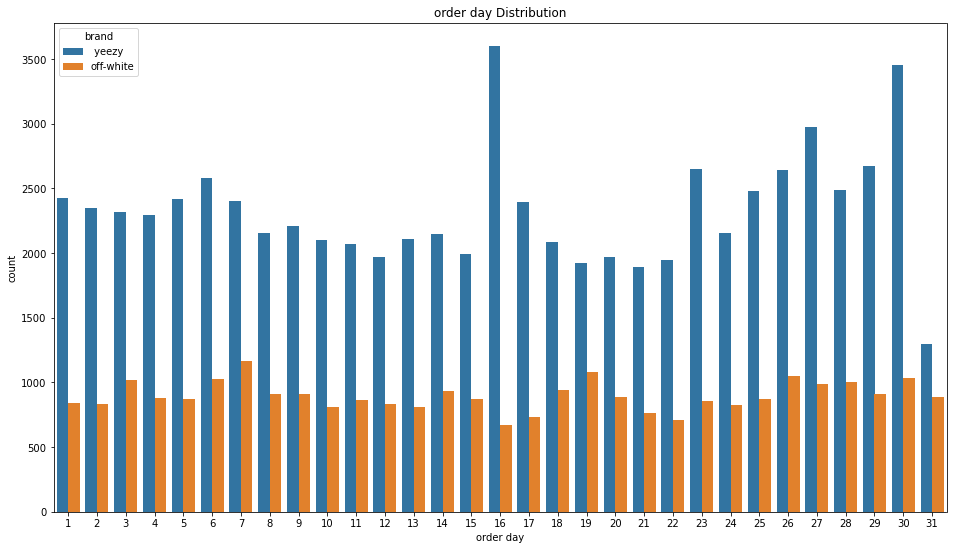

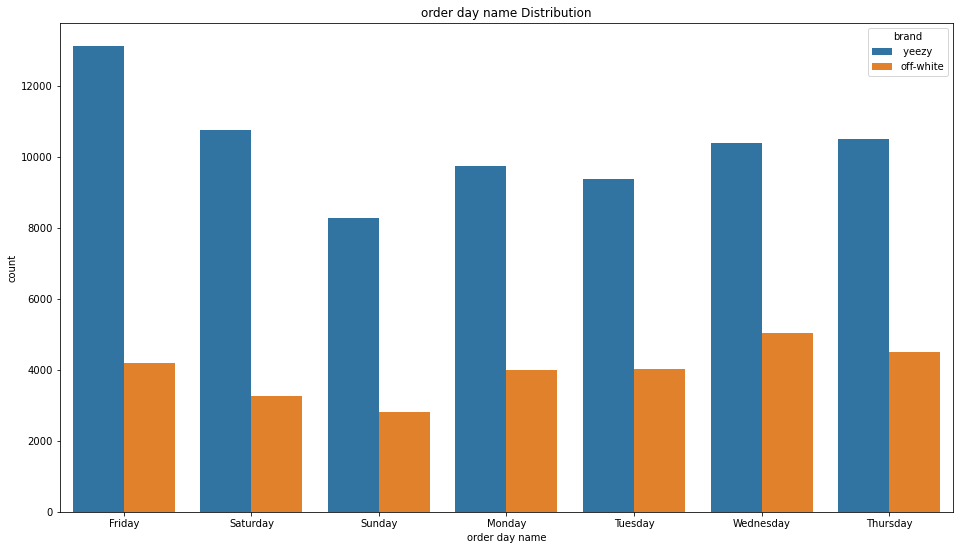

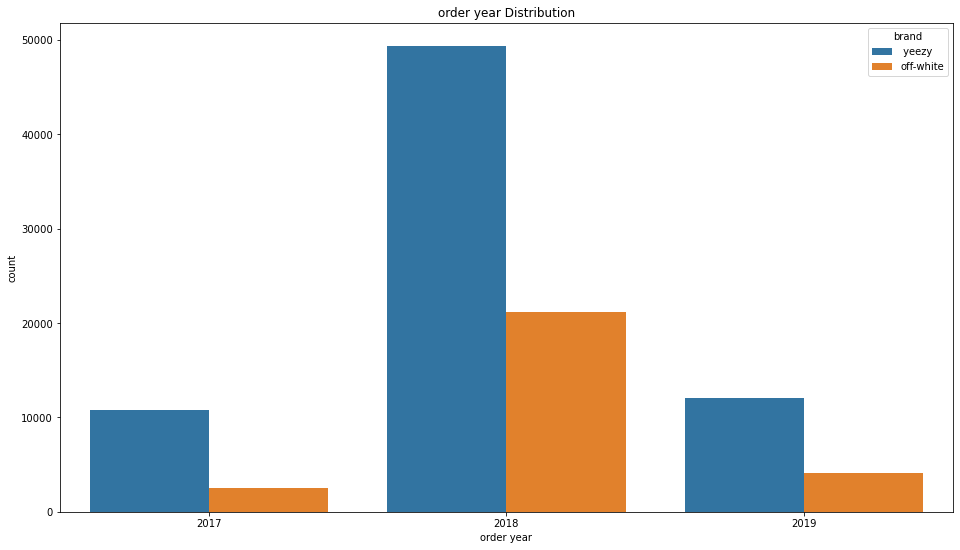

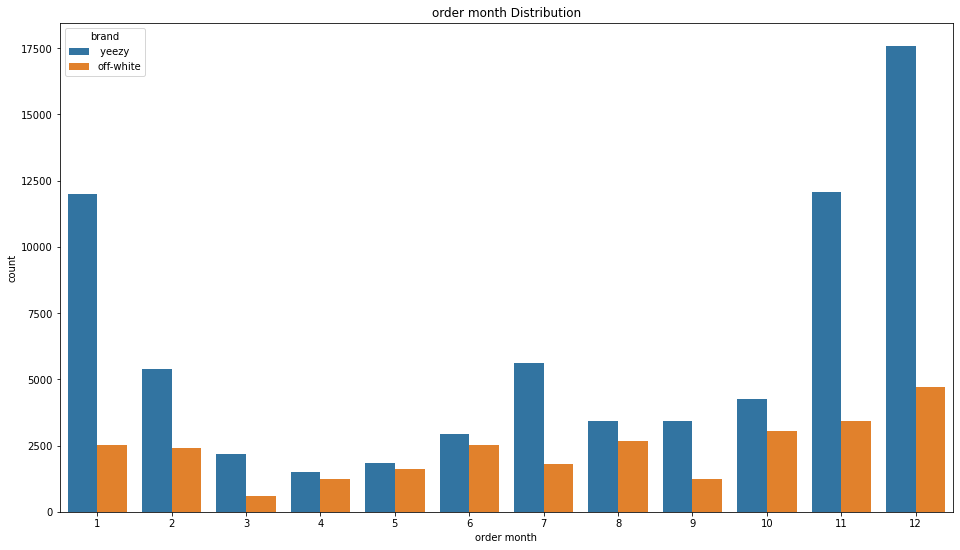

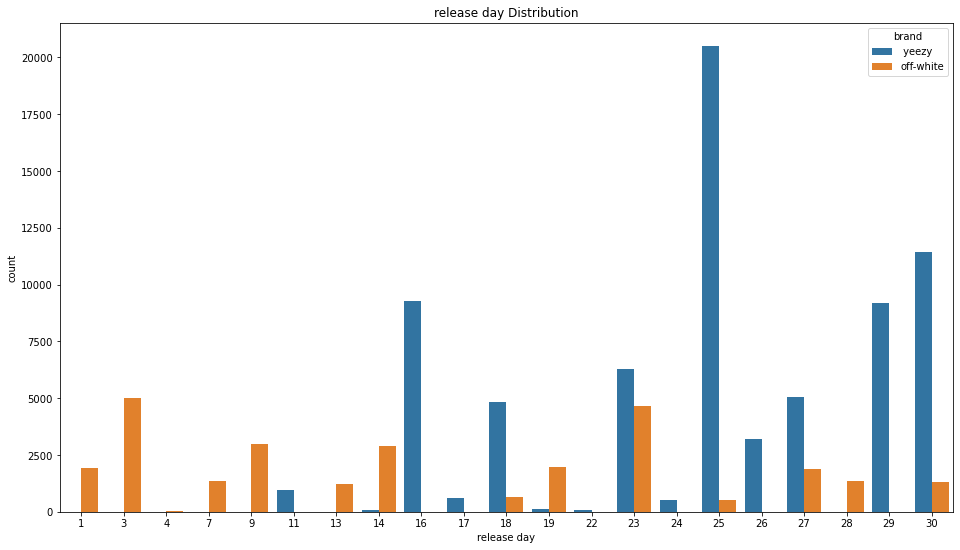

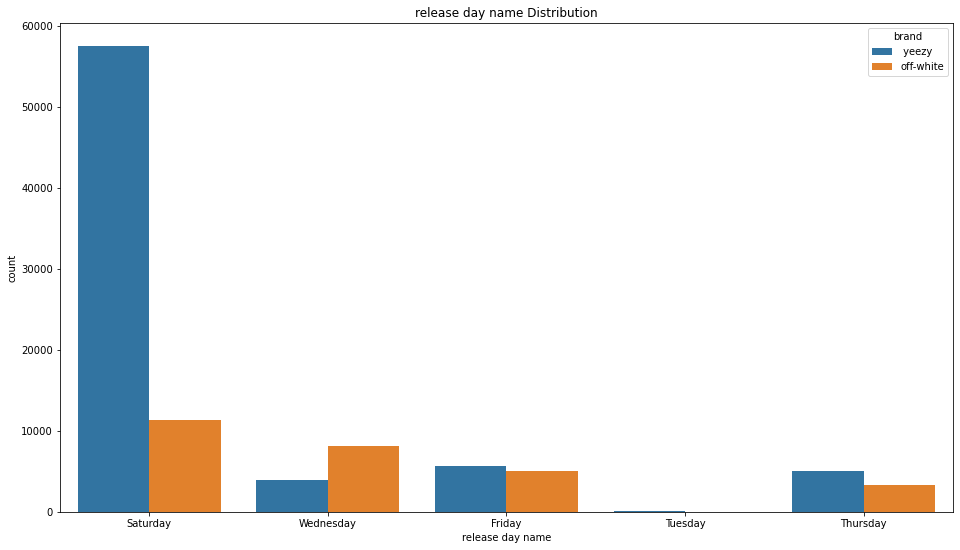

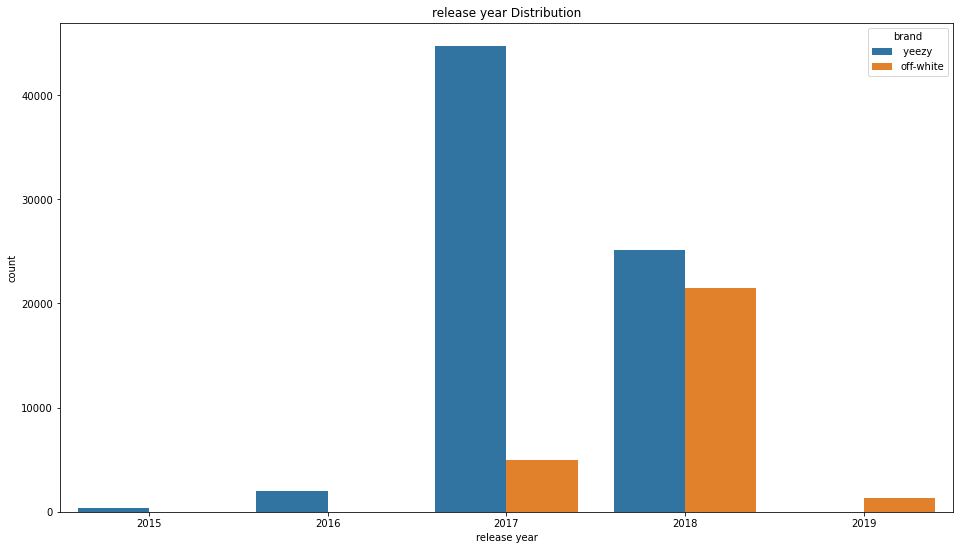

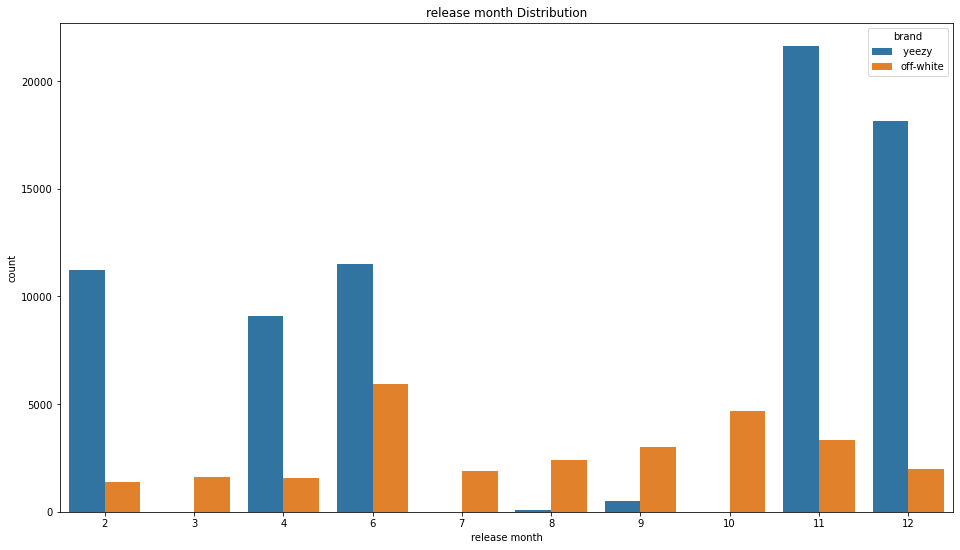

In [19]:
explore.compare_to_target(df.drop(columns=['sneaker name','order date', 'release date', 'days ordered since release', 'sale price', 'stock x trans fee cut', 'stock x level cut', 'stock x total cut','seller before tax profit']), 'brand')